[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/kostaslazaros/FSIHDD/blob/master/cross_val_scores_box_plots.ipynb)

In [5]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
import warnings
warnings.filterwarnings('ignore')

## Import utility functions

In [2]:
import sys
sys.path.append('./')

from helpers import utility_functions as ufn

## Initialize classifiers

In [3]:
rfc = RandomForestClassifier(n_estimators=100)
svmc = svm.SVC(kernel='linear', C=1)
lrc = LogisticRegression(random_state=0)
knn = KNeighborsClassifier(n_neighbors=5)

## Get dataset (all columns) and tags

In [6]:
X_full = pd.read_csv('dataset_full.csv')

In [7]:
Y = pd.read_csv('emtab_tags.csv')

In [ ]:
X_full

In [ ]:
Y

## Consensus dataset (after RFECV and borda rank based count)

In [11]:
X_consensus = pd.read_csv('consensus_data_6000.csv')

In [ ]:
X_consensus

## Cross validation for full-feature dataset (18958 features/genes)

In [8]:
rfc_scores = cross_validate(rfc, X_full, Y['result'], scoring=('accuracy', 'f1', 'roc_auc'), cv=10, return_estimator=True)

In [9]:
ufn.show_cross_val_scores(rfc_scores, 'Random Forest')

Random Forest scores
0.793 accuracy with a standard deviation of 0.032
0.872 f1 score with a standard deviation of 0.026
0.909 roc_auc with a standard deviation of 0.091


In [ ]:
svm_scores = cross_validate(svmc, X_full, Y['result'], scoring=('accuracy', 'f1', 'roc_auc'), cv=10, return_estimator=True)

In [ ]:
ufn.show_cross_val_scores(svm_scores, 'Support Vector Machine')

In [ ]:
lrc_scores = cross_validate(lrc, X_full, Y['result'], scoring=('accuracy', 'f1', 'roc_auc'), cv=10, return_estimator=True)

In [ ]:
ufn.show_cross_val_scores(lrc_scores, 'Logistic Regression')

In [ ]:
knn_scores = cross_validate(knn, X_full, Y['result'], scoring=('accuracy', 'f1', 'roc_auc'), cv=10, return_estimator=True)

In [ ]:
ufn.show_cross_val_scores(knn_scores, 'k nearest neighbors')

## Cross validation for "classic" classifiers (consensus data)

In [12]:
rfc_scores_consensus = cross_validate(rfc, X_consensus, Y['result'], scoring=('accuracy', 'f1', 'roc_auc'), cv=10, return_estimator=True)

In [13]:
ufn.show_cross_val_scores(rfc_scores_consensus, 'Random Forest')

Random Forest scores
0.858 accuracy with a standard deviation of 0.094
0.900 f1 score with a standard deviation of 0.087
0.948 roc_auc with a standard deviation of 0.075


In [ ]:
svm_scores_consensus = cross_validate(svmc, X_consensus, Y['result'], scoring=('accuracy', 'f1', 'roc_auc'), cv=10, return_estimator=True)

In [ ]:
ufn.show_cross_val_scores(svm_scores_consensus, 'Support Vector Machine')

In [ ]:
lrc_scores_consensus = cross_validate(lrc, X_consensus, Y['result'], scoring=('accuracy', 'f1', 'roc_auc'), cv=10, return_estimator=True)

In [ ]:
ufn.show_cross_val_scores(lrc_scores_consensus, 'Logistic Regression')

In [ ]:
knn_scores_consensus = cross_validate(knn, X_consensus, Y['result'], scoring=('accuracy', 'f1', 'roc_auc'), cv=10, return_estimator=True)

In [ ]:
ufn.show_cross_val_scores(knn_scores_consensus, 'k nearest neighbors')

## Random Forest metrics evaluation

In [14]:
# Scores on pre-processed dataset
rfc_acc = rfc_scores['test_accuracy']
rfc_f1 = rfc_scores['test_f1']
rfc_roc = rfc_scores['test_roc_auc']

# Scores on consensus dataset
rfc_acc_consensus = rfc_scores_consensus['test_accuracy']
rfc_f1_consensus = rfc_scores_consensus['test_f1']
rfc_roc_consensus = rfc_scores_consensus['test_roc_auc']

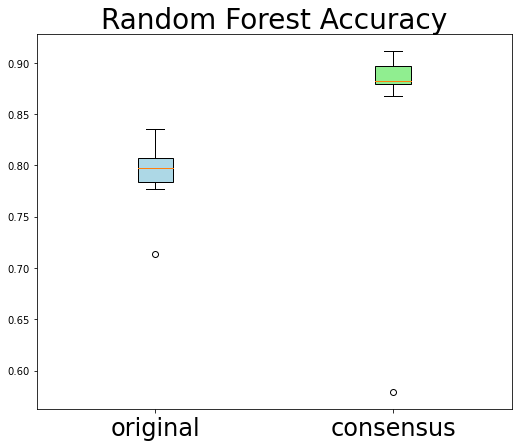

In [15]:
ufn.create_box_plot([rfc_acc, rfc_acc_consensus],['original', 'consensus'], 'rfc_acc.pdf', 'Random Forest Accuracy')

In [ ]:
ufn.create_box_plot([rfc_f1, rfc_f1_consensus],['original', 'consensus'], 'rfc_f1_score.pdf', 'Random Forest f1 score')

In [ ]:
ufn.create_box_plot([rfc_roc, rfc_roc_consensus],['original', 'consensus'], 'rfc_roc_auc.pdf', 'Random Forest ROC-AUC')

## Support Vector Machine metrics evaluation

In [ ]:
# Scores on pre-processed dataset
svm_acc = svm_scores['test_accuracy']
svm_f1 = svm_scores['test_f1']
svm_roc = svm_scores['test_roc_auc']

# Scores on consensus dataset
svm_acc_consensus = svm_scores_consensus['test_accuracy']
svm_f1_consensus = svm_scores_consensus['test_f1']
svm_roc_consensus = svm_scores_consensus['test_roc_auc']

In [ ]:
ufn.create_box_plot([svm_acc, svm_acc_consensus],['original', 'consensus'], 'svm_acc.pdf', 'Support Vector Machine Accuracy')

In [ ]:
ufn.create_box_plot([svm_f1, svm_f1_consensus],['original', 'consensus'], 'svm_f1_score.pdf', 'Support Vector Machine f1 score')

In [ ]:
ufn.create_box_plot([svm_roc, svm_roc_consensus],['original', 'consensus'], 'svm_roc_auc.pdf', 'Support Vector Machine ROC-AUC')

## Logistic Regression metrics evaluation


In [ ]:
# Scores on pre-processed dataset
lrc_acc = lrc_scores['test_accuracy']
lrc_f1 = lrc_scores['test_f1']
lrc_roc = lrc_scores['test_roc_auc']

# Scores on consensus dataset
lrc_acc_consensus = lrc_scores_consensus['test_accuracy']
lrc_f1_consensus = lrc_scores_consensus['test_f1']
lrc_roc_consensus = lrc_scores_consensus['test_roc_auc']

In [ ]:
ufn.create_box_plot([lrc_acc, lrc_acc_consensus],['original', 'consensus'], 'lrc_acc.pdf', 'Logistic Regression Accuracy')

In [ ]:
ufn.create_box_plot([lrc_f1, lrc_f1_consensus],['original', 'consensus'], 'lrc_f1_score.pdf', 'Logistic Regression f1 score')

In [ ]:
ufn.create_box_plot([lrc_roc, lrc_roc_consensus],['original', 'consensus'], 'lrc_roc_auc.pdf', 'Logistic Regression ROC-AUC')

In [ ]:
# Scores on pre-processed dataset
knn_acc = knn_scores['test_accuracy']
knn_f1 = knn_scores['test_f1']
knn_roc = knn_scores['test_roc_auc']

# Scores on consensus dataset
knn_acc_consensus = knn_scores_consensus['test_accuracy']
knn_f1_consensus = knn_scores_consensus['test_f1']
knn_roc_consensus = knn_scores_consensus['test_roc_auc']

In [ ]:
ufn.create_box_plot([knn_acc, knn_acc_consensus],['original', 'consensus'], 'knn_acc.pdf', 'K nearest neighbors Accuracy')

In [ ]:
ufn.create_box_plot([knn_f1, knn_f1_consensus],['original', 'consensus'], 'knn_f1_score.pdf', 'K nearest neighbors f1 score')

In [ ]:
ufn.create_box_plot([knn_roc, knn_roc_consensus],['original', 'consensus'], 'knn_roc_auc.pdf', 'K nearest neighbors ROC-AUC')